<a href="https://colab.research.google.com/github/dongyoon9802/pythonAnalasys/blob/main/pyhtonAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Google drive에서 다운로드 받은 파일들을 불러옵니다.

In [41]:
from google.colab import drive
drive.mount('/content/drive')
mainlink = '/content/drive/MyDrive/SD/project' #datafile link

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np

아래에서 불러오는 파일은 금리 및 미분양 주택수, 전세가 지수 데이터를 가져오는 것입니다.

In [81]:
severalData = pd.read_csv(mainlink+'/복수통계_19193346.csv')
type(severalData)

pandas.core.frame.DataFrame

받아온 데이터를 확인해보니 삭제해야할 컬럼들이 보이네요

In [82]:
severalData.head()


,통계표,항목명1,단위,가중치,변환,2023/04,2023/03,2023/02,2023/01,2022/12,...,2006/01/13,2006/01/12,2006/01/11,2006/01/10,2006/01/09,2006/01/06,2006/01/05,2006/01/04,2006/01/03,2006/01/02
0,1.3.3.2.2. 예금은행 대출금리(잔액 기준),주택담보대출,연리%,NaN,원자료,NaN,4.12,4.05,3.96,3.83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.2.1. 소비자물가지수,전세,2020=100,54.0,원자료,105.07,105.2,105.36,105.42,105.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.3.1. 한국은행 기준금리 및 여수신금리,한국은행 기준금리,연%,NaN,원자료,3.50,3.50,3.50,3.50,3.25,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75
3,8.4.5. 미분양주택현황,전국,호,NaN,원자료,NaN,"72,104","75,438","75,359","68,107",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.4.5. 미분양주택현황,수도권,호,NaN,원자료,NaN,"11,034","12,541","12,257","11,035",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


na값의 존재를 확인합니다. 확인결과 21644개의 na값이 존재하네요

In [83]:

print(severalData.isna().values.any())
print(severalData.isna().sum().sum())


True
21649


필요없어보이는 '통계표','가중치','변환' 컬럼들을 제거해줍니다.

In [84]:
#필요없는 column은 제거
severalDataEdit = severalData.drop(columns=['통계표','가중치','변환'])

In [62]:
severalData.head()

,항목명1,단위,2023/04,2023/03,2023/02,2023/01,2022/12,2022/11,2022/10,2022/09,...,2006/01/13,2006/01/12,2006/01/11,2006/01/10,2006/01/09,2006/01/06,2006/01/05,2006/01/04,2006/01/03,2006/01/02
0,주택담보대출,연리%,NaN,4.12,4.05,3.96,3.83,3.66,3.52,3.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,전세,2020=100,105.07,105.2,105.36,105.42,105.35,105.28,105.13,105.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,한국은행 기준금리,연%,3.50,3.50,3.50,3.50,3.25,3.25,3.00,2.50,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75
3,전국,호,NaN,"72,104","75,438","75,359","68,107","58,027","47,217","41,604",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,수도권,호,NaN,"11,034","12,541","12,257","11,035","10,373","7,612","7,813",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
severalData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Columns: 4525 entries, 통계표 to 2006/01/02
dtypes: float64(4326), object(199)
memory usage: 212.2+ KB


In [65]:
severalData.index

RangeIndex(start=0, stop=6, step=1)

na값의 존재 이유가 몇 년도 이전부터는 없는 것으로 보아 데이터들마다 na값을 제거하고 몇 년도 부터 데이터가 존재하는지 확인합니다. 그러기 위해서는 데이터의 종류별로 나눠준 후에 na값을 확인합니다.

In [86]:
#데이터를 주담대금리, 전세가물가지수, 기준금리, 전국미분양주택수, 수조권미분양주택수로 나눕니다.
mortgageLoan = severalData.iloc[[1]] 
houseRent = severalData.iloc[[2]] 
baseRate = severalData.iloc[[3]] 
unsoldNationwide = severalData.iloc[[4]] 
unsoldRegionwide = severalData.iloc[[5]] 


주담대 데이터에서 na값이 가장 많이 나온것을 보니 가장 데이터의 기간이 짧네요 아무래도 이 데이터를 기준으로 분석 기준을 세워야 할 듯 싶습니다.

In [89]:
print('주담대 : '+ str(mortgageLoan.isna().sum().sum()))
print('전세가지수 : '+str(houseRent.isna().sum().sum()))
print('기준금리 : '+str(baseRate.isna().sum().sum()))
print('전국미분양주택건수 : '+str(unsoldNationwide.isna().sum().sum()))
print('수도권미분양주택건수 : '+str(unsoldRegionwide.isna().sum().sum()))

주담대 : 4312
전세가지수 : 1
기준금리 : 4326
전국미분양주택건수 : 4326
수도권미분양주택건수 : 4326


In [74]:
houseRent

,항목명1,단위,2023/04,2023/03,2023/02,2023/01,2022/12,2022/11,2022/10,2022/09,...,2006/01/13,2006/01/12,2006/01/11,2006/01/10,2006/01/09,2006/01/06,2006/01/05,2006/01/04,2006/01/03,2006/01/02
2,한국은행 기준금리,연%,3.5,3.50,3.50,3.50,3.25,3.25,3.00,2.50,...,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75,3.75


TypeError: ignored

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HAN

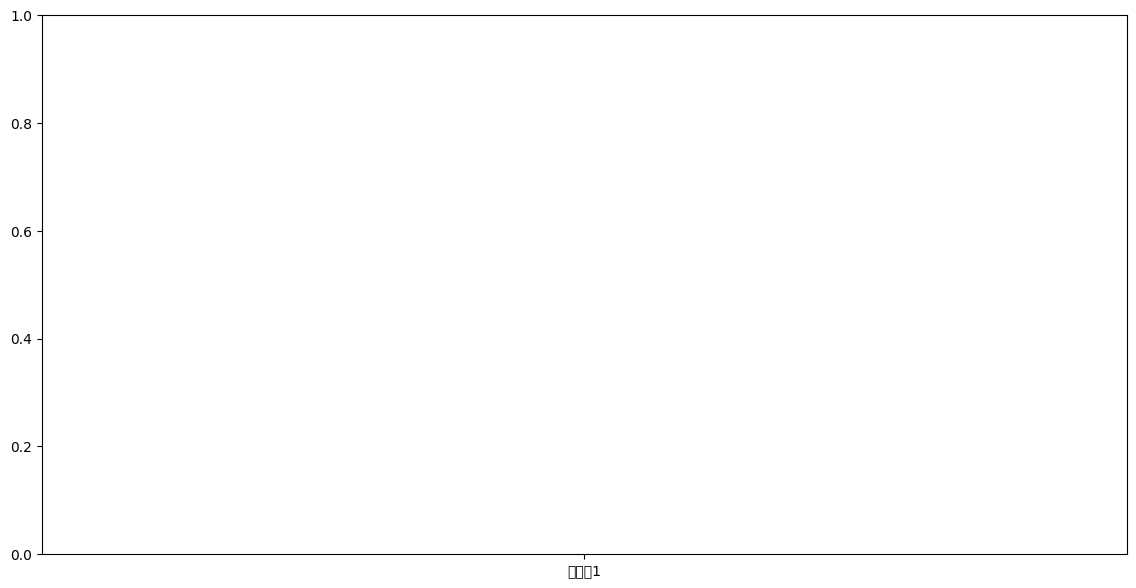

In [76]:
import matplotlib.pyplot as plt

# Transpose the dataframes so that the dates are the indices (for the x-axis)
mortgageLoan_t = mortgageLoan.transpose()
houseRent_t = houseRent.transpose()
baseRate_t = baseRate.transpose()
unsoldNationwide_t = unsoldNationwide.transpose()
unsoldRegionwide_t = unsoldRegionwide.transpose()

plt.figure(figsize=(14, 7))

# Plot each dataframe
plt.plot(mortgageLoan_t, label='Mortgage Loan')
plt.plot(houseRent_t, label='House Rent')
plt.plot(baseRate_t, label='Base Rate')
plt.plot(unsoldNationwide_t, label='Unsold Nationwide')
plt.plot(unsoldRegionwide_t, label='Unsold Regionwide')

# Add a legend
plt.legend()

# Add titles and labels
plt.title('Data over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# Show the plot
plt.show()


In [46]:
apartAvgPriceSize = pd.read_excel(mainlink+'/규모별_아파트_매매_평균가격.xlsx')
apartRentPriceSize = pd.read_excel(mainlink+'/규모별_아파트_전세_평균가격.xlsx')

apartAvgPriceRegi = pd.read_excel(mainlink+'/지역별_아파트_매매_평균가격.xlsx')
apartRentPriceRegi = pd.read_excel(mainlink+'/지역별_아파트_전세_평균가격.xlsx')




In [47]:
apartAvgPriceSize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Columns: 209 entries, 지 역 to 2023년 03월
dtypes: float64(207), object(2)
memory usage: 32.8+ KB


In [48]:
apartAvgPriceSize.head()

,지 역,규모,2006년 01월,2006년 02월,2006년 03월,2006년 04월,2006년 05월,2006년 06월,2006년 07월,2006년 08월,...,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월,2022년 12월,2023년 01월,2023년 02월,2023년 03월
0,전국,초소형,246.172829,195.422991,230.083410,225.324228,208.896001,182.631381,177.093836,197.174376,...,351.569947,332.912367,346.396266,330.207327,332.949525,316.886939,344.971085,386.693348,427.188591,397.297931
1,전국,소형,235.808813,196.580956,215.303024,208.748593,204.834399,188.376758,188.666225,200.810338,...,350.616598,332.266288,335.557222,329.089179,319.156325,354.424051,381.594834,452.405307,497.738400,476.073581
2,전국,중소형,298.050384,257.933826,274.675950,261.913230,253.093019,225.661198,227.079637,240.063883,...,434.303058,425.908222,420.760579,410.044272,415.469293,454.835611,471.974048,510.935557,533.276235,524.571724
3,전국,중대형,415.210816,356.822515,382.712219,337.352499,314.768653,283.174126,271.142818,288.609114,...,554.092623,513.663490,518.927511,493.637246,501.633129,524.391361,544.558879,563.018713,603.591473,598.982218
4,전국,대형,519.110232,455.332878,474.450173,401.216299,337.944042,295.010419,299.187722,321.620515,...,694.521305,613.764135,544.170268,603.066274,549.379990,550.528650,530.255792,622.231016,589.194527,657.795239


In [49]:
apartAvgPriceSize.columns

Index(['지 역', '규모', '2006년 01월', '2006년 02월', '2006년 03월', '2006년 04월',
       '2006년 05월', '2006년 06월', '2006년 07월', '2006년 08월',
       ...
       '2022년 06월', '2022년 07월', '2022년 08월', '2022년 09월', '2022년 10월',
       '2022년 11월', '2022년 12월', '2023년 01월', '2023년 02월', '2023년 03월'],
      dtype='object', length=209)